In [1]:
# Import Packages
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns 

from sklearn.metrics import silhouette_score, silhouette_samples
import sklearn.metrics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture

import itertools

import scipy

from yellowbrick.cluster import SilhouetteVisualizer, InterclusterDistance, KElbowVisualizer

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# This will ensure that matplotlib figures don't get cut off when saving with savefig()
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

C:\Users\ari62\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# Reading the csv file
data = pd.read_csv("jewelry_customers.csv")

In [3]:
data.head()

,Age,Income,SpendingScore,Savings
0,58,77769,0.791329,6559.829923
1,59,81799,0.791082,5417.661426
2,62,74751,0.702657,9258.992965
3,59,74373,0.765680,7346.334504
4,87,17760,0.348778,16869.507130


In [4]:
# Checking for missing data
pd.DataFrame(data).isna().sum()

Age              0
Income           0
SpendingScore    0
Savings          0
dtype: int64

No missing data

<Figure size 432x288 with 0 Axes>

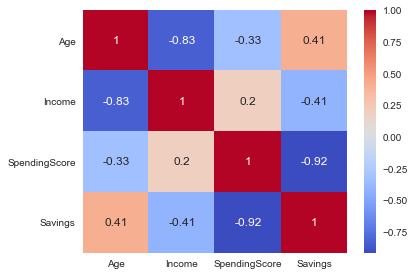

In [5]:
# Checking for collinearity between the features
plt.figure(figsize=(6,4))
sns.heatmap(data.corr(),cmap='coolwarm',annot=True)

Income and Age are correlated. Savings and Spending score are highly correlated

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            505 non-null    int64  
 1   Income         505 non-null    int64  
 2   SpendingScore  505 non-null    float64
 3   Savings        505 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 15.9 KB


In [7]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,505.0,59.019802,24.140043,17.0,34.000000,59.000000,85.000000,97.0
Income,505.0,75513.291089,35992.922184,12000.0,34529.000000,75078.000000,107100.000000,142000.0
SpendingScore,505.0,0.505083,0.259634,0.0,0.304792,0.368215,0.768279,1.0
Savings,505.0,11862.455867,4949.229253,0.0,6828.709702,14209.932802,16047.268331,20000.0


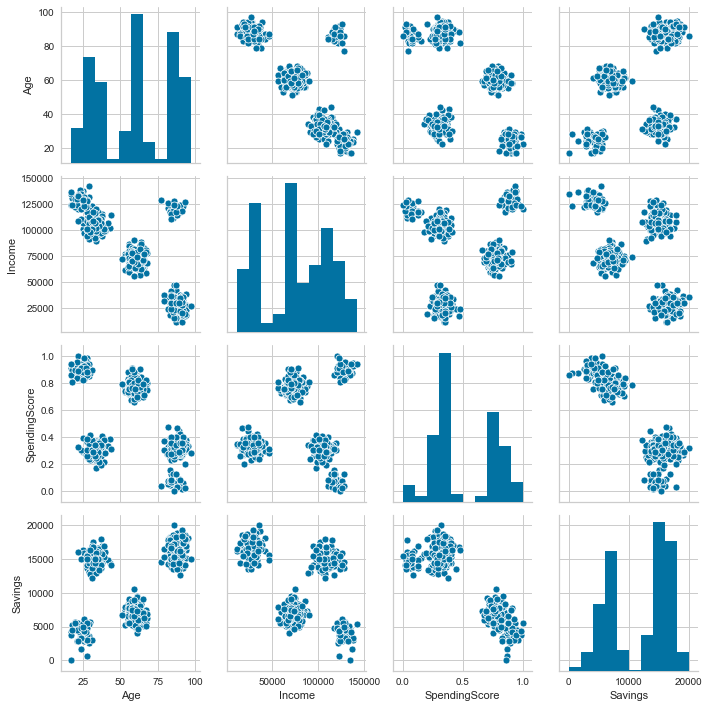

In [8]:
# To get a visualization of the data
import seaborn as sns
# Plot the pairwise realtionships between features
sns.pairplot(data)

By eyeball test, we can say there are 4 to 5 clusters

In [9]:
# Copying the data to X
X = data.copy()
X.head(5)

,Age,Income,SpendingScore,Savings
0,58,77769,0.791329,6559.829923
1,59,81799,0.791082,5417.661426
2,62,74751,0.702657,9258.992965
3,59,74373,0.765680,7346.334504
4,87,17760,0.348778,16869.507130


In [10]:
data.columns

Index(['Age', 'Income', 'SpendingScore', 'Savings'], dtype='object')

In [11]:
# Normalizing the data
scaler = StandardScaler()
features = ['Age', 'Income', 'SpendingScore', 'Savings']
X[features] = scaler.fit_transform(X[features])

In [12]:
X.shape
X.info()
X.describe().transpose()
X.head(10)

(505, 4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            505 non-null    float64
 1   Income         505 non-null    float64
 2   SpendingScore  505 non-null    float64
 3   Savings        505 non-null    float64
dtypes: float64(4)
memory usage: 15.9 KB


,count,mean,std,min,25%,50%,75%,max
Age,505.0,5.672031e-17,1.000992,-1.742394,-1.037472,-0.000821,1.077295,1.574888
Income,505.0,-2.638154e-17,1.000992,-1.766355,-1.139805,-0.012106,0.878451,1.849048
SpendingScore,505.0,-1.954432e-16,1.000992,-1.947295,-0.772201,-0.527678,1.014725,1.908103
Savings,505.0,-4.058360e-16,1.000992,-2.399206,-1.018085,0.474782,0.846387,1.645835


,Age,Income,SpendingScore,Savings
0,-0.042287,0.062733,1.103593,-1.072467
1,-0.000821,0.174811,1.102641,-1.303473
2,0.123577,-0.021200,0.761727,-0.526556
3,-0.000821,-0.031712,1.004705,-0.913395
4,1.160228,-1.606165,-0.602619,1.012686
5,-1.244802,1.559204,1.318359,-1.684141
6,-0.208151,0.027441,1.079955,-1.007937
7,1.160228,-0.915567,-0.577512,1.258782
8,0.994363,-1.143838,-0.695375,0.590763
9,1.035829,-1.329920,-0.532121,1.216971


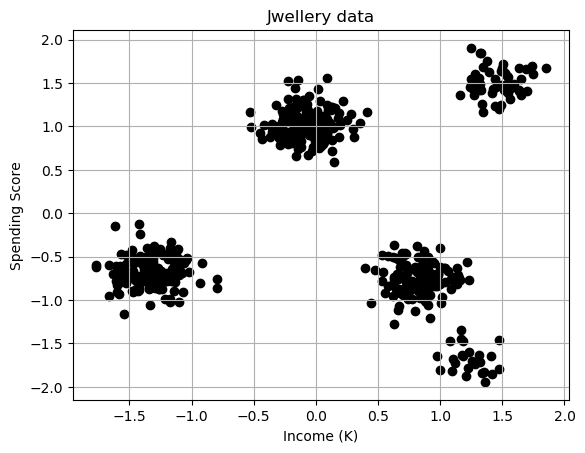

In [13]:
# Plot the data

plt.style.use('default');

plt.figure();
plt.grid(True);

plt.scatter(X.iloc[:, 1], X.iloc[:, 2], c="black");
plt.title("Jwellery data");
plt.xlabel('Income (K)');
plt.ylabel('Spending Score');
plt.xticks();
plt.yticks();

# Model 1: K Means Clustering

In [14]:
# Using K-Means algorithm to create clusters. The number of clusters(k) is taken as 5 based on the above plot.

k_means = KMeans(init='k-means++', n_clusters=5, n_init=10, random_state=42)
k_means.fit(X)

KMeans(n_clusters=5, random_state=42)

In [15]:
k_means.labels_

array([2, 2, 2, 2, 0, 3, 2, 0, 0, 0, 4, 1, 1, 1, 2, 4, 2, 0, 0, 4, 1, 4,
       2, 0, 4, 3, 3, 2, 0, 2, 2, 2, 0, 2, 1, 2, 0, 2, 1, 1, 2, 0, 3, 2,
       2, 3, 4, 3, 1, 2, 0, 1, 3, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       0, 3, 3, 2, 2, 1, 0, 0, 1, 2, 1, 2, 2, 3, 2, 4, 2, 0, 0, 1, 1, 2,
       2, 2, 2, 2, 3, 0, 2, 3, 1, 2, 2, 1, 1, 3, 1, 3, 1, 0, 0, 1, 1, 2,
       0, 1, 2, 1, 1, 1, 2, 1, 3, 0, 1, 0, 0, 0, 1, 4, 2, 0, 2, 2, 1, 2,
       1, 2, 3, 0, 4, 3, 2, 1, 0, 2, 2, 3, 2, 3, 2, 4, 2, 0, 2, 1, 0, 2,
       0, 4, 1, 2, 0, 2, 1, 0, 2, 1, 0, 1, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2,
       2, 0, 0, 0, 2, 2, 1, 3, 3, 0, 1, 2, 2, 2, 1, 0, 2, 2, 2, 0, 3, 1,
       0, 0, 0, 1, 2, 1, 2, 1, 2, 0, 3, 2, 0, 0, 0, 0, 2, 0, 1, 3, 1, 0,
       2, 2, 1, 0, 1, 3, 1, 2, 2, 0, 2, 2, 0, 2, 2, 2, 1, 2, 1, 1, 3, 2,
       2, 2, 4, 2, 1, 0, 3, 3, 3, 0, 2, 1, 0, 0, 1, 1, 2, 2, 4, 2, 2, 0,
       2, 0, 1, 3, 2, 1, 0, 2, 0, 0, 1, 2, 0, 0, 2, 2, 0, 1, 1, 4, 1, 0,
       0, 1, 4, 0, 0, 3, 2, 1, 1, 2, 1, 0, 0, 1, 2,

In [16]:
# Let's look at the centers
k_means.cluster_centers_

array([[ 1.19238486, -1.32510593, -0.67963841,  0.97016358],
       [-1.08815238,  0.82744102, -0.75240648,  0.6270464 ],
       [ 0.03879611, -0.08524639,  1.02721559, -1.00569483],
       [-1.44466803,  1.46050665,  1.51057952, -1.57249636],
       [ 1.11876151,  1.23565419, -1.68367042,  0.59588052]])

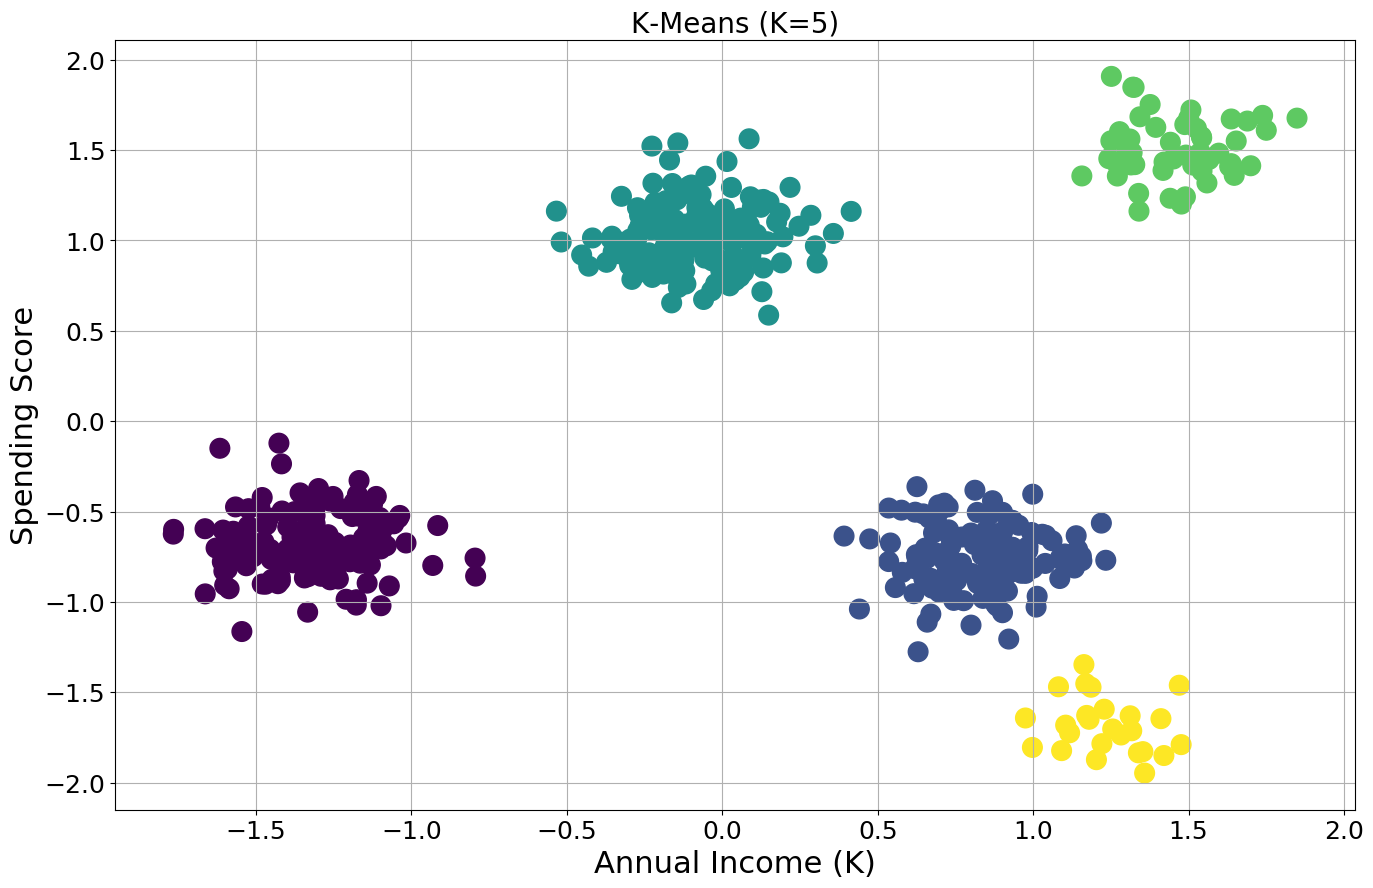

In [17]:
#Plot the clusters

plt.style.use('default');

plt.figure(figsize=(16, 10));
plt.grid(True);

sc = plt.scatter(X.iloc[:, 1], X.iloc[:, 2], s=200, c=k_means.labels_);

plt.title("K-Means (K=5)", fontsize=20);
plt.xlabel('Annual Income (K)', fontsize=22);
plt.ylabel('Spending Score', fontsize=22);
plt.xticks(fontsize=18);
plt.yticks(fontsize=18);

# Internal Validation Metrics

In [18]:
# WCSS == Inertia
k_means.inertia_

66.51111374859076

In [19]:
silhouette_score(X, k_means.labels_)

0.8048976287755765

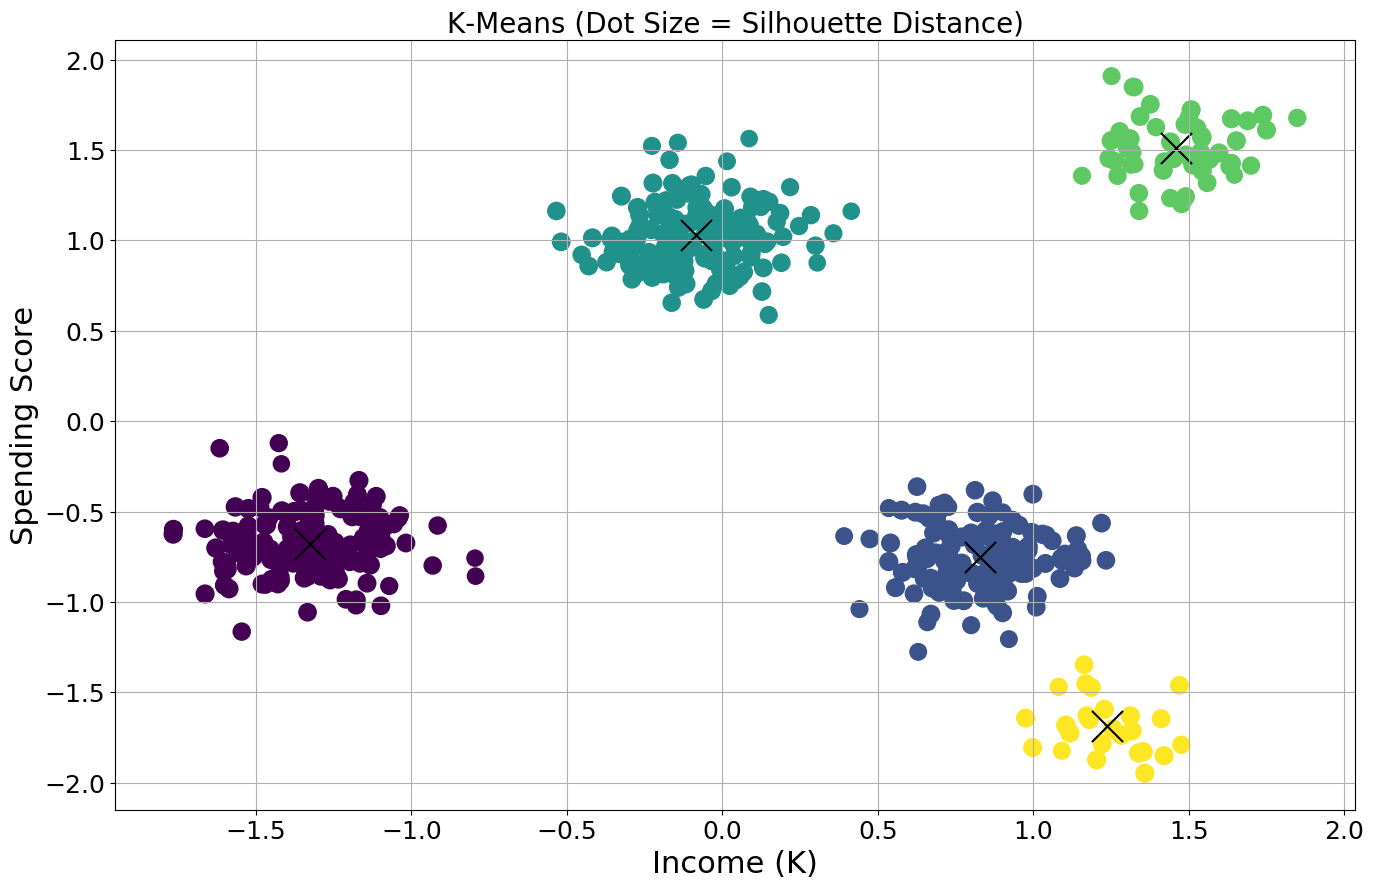

In [20]:
# Plotting the clusters along with their centres

plt.style.use('default');

sample_silhouette_values = silhouette_samples(X, k_means.labels_)
sizes = 200*sample_silhouette_values

plt.figure(figsize=(16, 10));
plt.grid(True);

plt.scatter(X.iloc[:, 1], X.iloc[:, 2], s=sizes, c=k_means.labels_)
plt.scatter(k_means.cluster_centers_[:, 1], k_means.cluster_centers_[:, 2], marker='x', s=500, c="black")

plt.title("K-Means (Dot Size = Silhouette Distance)", fontsize=20);
plt.xlabel('Income (K)', fontsize=22);
plt.ylabel('Spending Score', fontsize=22);
plt.xticks(fontsize=18);
plt.yticks(fontsize=18);

C:\Users\ari62\anaconda3\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


InterclusterDistance(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x00000163629AA3C8>,
                     model=None)

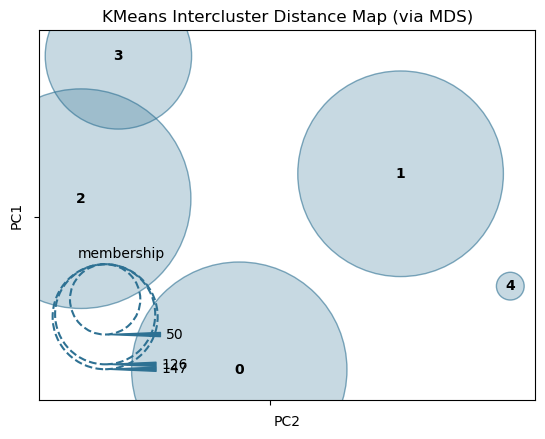

In [21]:
# Instantiate the clustering model and visualizer
visualizer = InterclusterDistance(k_means)

visualizer.fit(X) # Fit the training data to the visualizer
visualizer.poof() # Draw/show/poof the data

Summary Statistics of each cluster

In [22]:
for label in set(k_means.labels_):
    print('\nCluster {}:'.format(label))
    X_tmp = X[k_means.labels_==label].copy()
    X_tmp.loc['min'] = X_tmp.min()
    X_tmp.loc['mean'] = X_tmp.mean()
    X_tmp.loc['max'] = X_tmp.max()
    X_tmp.loc['count'] = X_tmp.count()
    X_tmp.loc['Variance'] = X_tmp.var()
    X_tmp.loc['Skewness'] = X_tmp.skew()
    X_tmp.loc['Kurtosis'] = X_tmp.kurtosis()
    X_tmp.tail(7).transpose()


Cluster 0:


,min,mean,max,count,Variance,Skewness,Kurtosis
Age,0.828499,1.189926,1.574888,150.0,146.669313,8.630862,73.777631
Income,-1.766355,-1.328087,-0.793617,150.0,151.684234,8.629093,73.608606
SpendingScore,-1.164109,-0.682912,-0.121573,150.0,150.392252,8.628733,73.636148
Savings,0.325325,0.965807,1.645835,150.0,147.146647,8.628586,73.735212



Cluster 1:


,min,mean,max,count,Variance,Skewness,Kurtosis
Age,-1.535064,-1.091671,-0.622811,129.0,130.203323,7.997530,63.107472
Income,0.391707,0.824010,1.233790,129.0,126.401771,7.998338,63.236991
SpendingScore,-1.275991,-0.756529,-0.362296,129.0,129.540553,7.997019,63.119835
Savings,0.069791,0.622659,1.234971,129.0,126.815517,7.996981,63.207548



Cluster 2:


,min,mean,max,count,Variance,Skewness,Kurtosis
Age,-0.332549,0.036446,0.372373,160.0,158.950280,8.914478,78.687856
Income,-0.533753,-0.088085,0.414623,160.0,159.207271,8.913914,78.674074
SpendingScore,0.586913,1.024429,1.562724,160.0,157.003701,8.914976,78.756021
Savings,-1.574491,-1.009295,-0.265897,160.0,161.058901,8.913269,78.618462



Cluster 3:


,min,mean,max,count,Variance,Skewness,Kurtosis
Age,-1.742394,-1.450506,-1.161870,53.0,54.918296,5.094290,24.973845
Income,1.156782,1.454551,1.849048,53.0,49.215989,5.103377,25.357087
SpendingScore,1.162288,1.503750,1.908103,53.0,49.125271,5.103692,25.367836
Savings,-2.399206,-1.588706,-1.167596,53.0,55.245438,5.091321,24.949090



Cluster 4:


,min,mean,max,count,Variance,Skewness,Kurtosis
Age,0.745567,1.104408,1.409024,28.0,24.951469,3.680248,12.799275
Income,0.975288,1.225640,1.476272,28.0,24.723680,3.685506,12.863384
SpendingScore,-1.947295,-1.693810,-1.347032,28.0,30.405514,3.667612,12.329220
Savings,0.140006,0.578347,1.207573,28.0,25.954626,3.660948,12.563329


# Interpreting the clusters

In [23]:
# In the case of K-Means, the cluster centers *are* the feature means - that's how K-Means is defined! Sweet!
scaler.inverse_transform(k_means.cluster_centers_)

array([[8.77755102e+01, 2.78661020e+04, 3.28800461e-01, 1.66592614e+04],
       [3.27777778e+01, 1.05265810e+05, 3.09926130e-01, 1.49627781e+04],
       [5.99554140e+01, 7.24480637e+04, 7.71518368e-01, 6.88997219e+03],
       [2.41800000e+01, 1.28029120e+05, 8.96891640e-01, 4.08752031e+03],
       [8.60000000e+01, 1.19944040e+05, 6.83780993e-02, 1.48086838e+04]])

In [24]:
# Let's look at some example rows in each.
for label in set(k_means.labels_):
    print('\nCluster {}:'.format(label))
    print(scaler.inverse_transform(X[k_means.labels_==label].head()))


Cluster 0:
[[8.70000000e+01 1.77600000e+04 3.48777548e-01 1.68695071e+04]
 [8.70000000e+01 4.25920000e+04 3.55289682e-01 1.80862872e+04]
 [8.30000000e+01 3.43840000e+04 3.24718682e-01 1.47833791e+04]
 [8.40000000e+01 2.76930000e+04 3.67062973e-01 1.78795589e+04]
 [8.70000000e+01 3.14810000e+04 3.17423971e-01 1.61806881e+04]]

Cluster 1:
[[3.60000000e+01 9.97800000e+04 2.65432607e-01 1.63984013e+04]
 [3.00000000e+01 9.99490000e+04 3.44679224e-01 1.36216397e+04]
 [3.10000000e+01 1.07963000e+05 2.90508633e-01 1.34070814e+04]
 [3.00000000e+01 1.01073000e+05 3.14387120e-01 1.43245560e+04]
 [3.30000000e+01 1.01058000e+05 3.15081550e-01 1.49118684e+04]]

Cluster 2:
[[5.80000000e+01 7.77690000e+04 7.91328777e-01 6.55982992e+03]
 [5.90000000e+01 8.17990000e+04 7.91082047e-01 5.41766143e+03]
 [6.20000000e+01 7.47510000e+04 7.02656952e-01 9.25899297e+03]
 [5.90000000e+01 7.43730000e+04 7.65679562e-01 7.34633450e+03]
 [5.40000000e+01 7.65000000e+04 7.85197850e-01 6.87888425e+03]]

Cluster 3:
[[2.

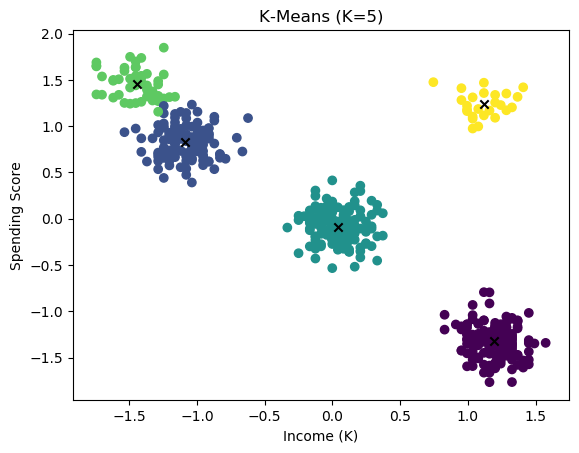

In [25]:
plt.figure();
sc = plt.scatter(X.iloc[:, 0], X.iloc[:, 1],  c=k_means.labels_);
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], marker='x', c="black");
plt.title("K-Means (K=5)");
plt.xlabel('Income (K)');
plt.ylabel('Spending Score');

# Hyperparameter Tuning

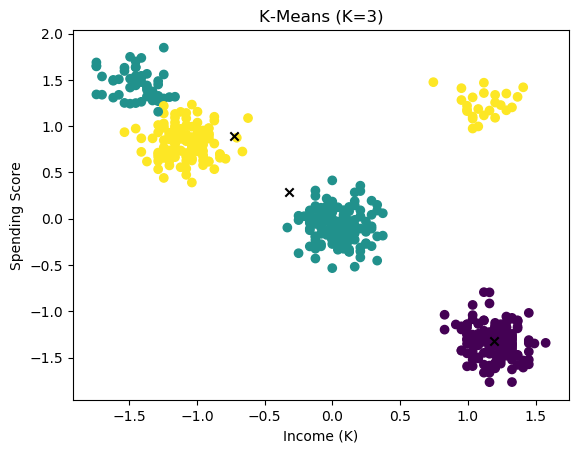

K=3, WCSS=384.81, Sil=0.70


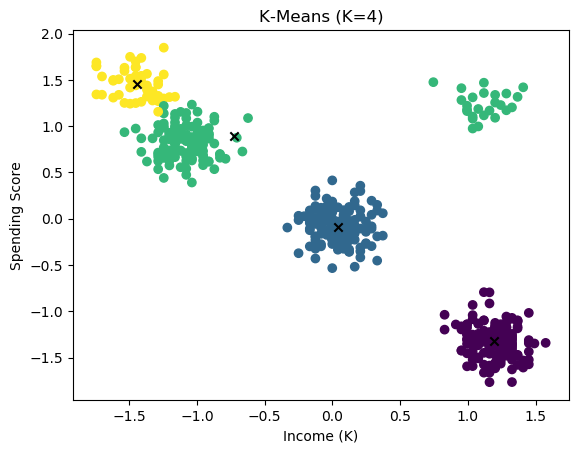

K=4, WCSS=189.70, Sil=0.76


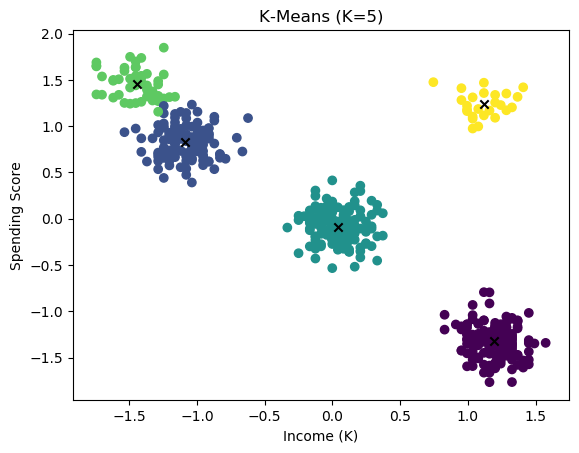

K=5, WCSS=66.51, Sil=0.80


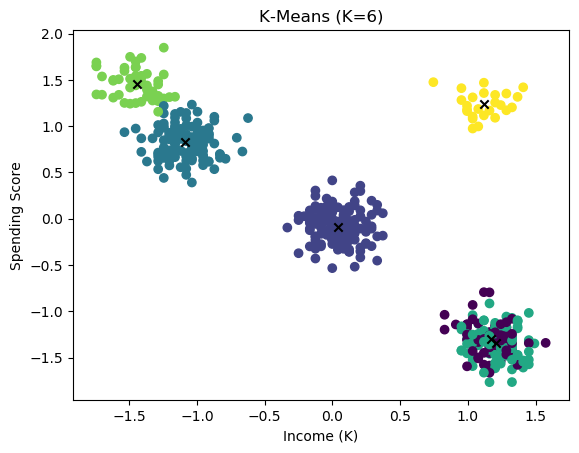

K=6, WCSS=61.14, Sil=0.63


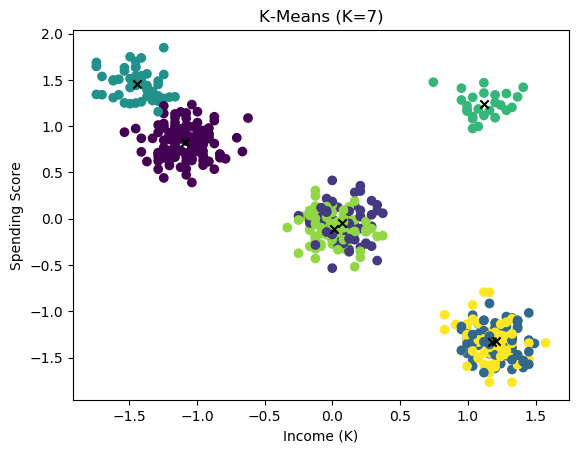

K=7, WCSS=56.89, Sil=0.45


In [26]:
def do_kmeans(X, k):
    k_means = KMeans(init='k-means++', n_clusters=k, n_init=10, random_state=42)
    k_means.fit(X)

    plt.figure();
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=k_means.labels_)
    plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], marker='x', c="black")
    plt.title("K-Means (K={})".format(k));
    plt.xlabel('Income (K)');
    plt.ylabel('Spending Score');
    #plt.savefig('out/simple_kmeans_k{}.png'.format(k))
    plt.show()
    
    wcss = k_means.inertia_
    sil = silhouette_score(X, k_means.labels_)
    print("K={}, WCSS={:.2f}, Sil={:.2f}".format(k, wcss, sil))

for k in range(3, 8):
    do_kmeans(X, k)

# Elbow method 

The Elbow Method can help us choose the best values for hyperparameters, in this case, K

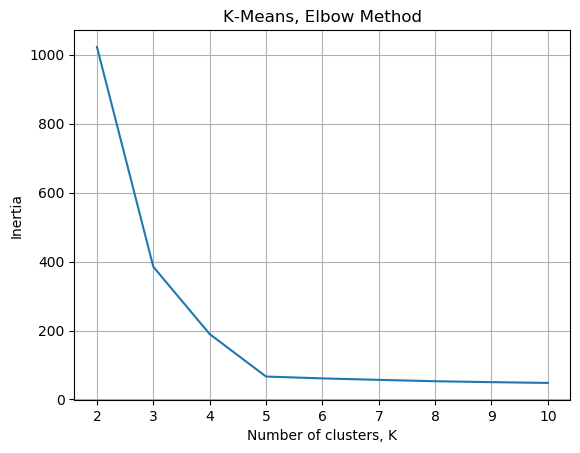

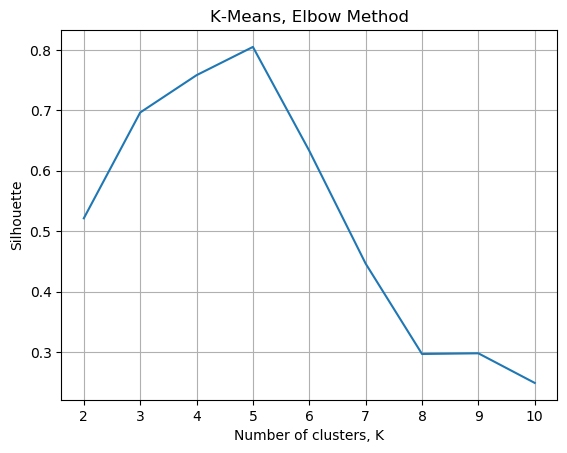

In [27]:
inertias = {}
silhouettes = {}
for k in range(2, 11):
    kmeans = KMeans(init='k-means++', n_init=10, n_clusters=k, max_iter=1000, random_state=42).fit(X)
    inertias[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    silhouettes[k] = silhouette_score(X, kmeans.labels_, metric='euclidean')
    

plt.figure();
plt.grid(True);
plt.plot(list(inertias.keys()), list(inertias.values()));
plt.title('K-Means, Elbow Method')
plt.xlabel("Number of clusters, K");
plt.ylabel("Inertia");
#plt.savefig('out/mall-kmeans-elbow-interia.png');


plt.figure();
plt.grid(True);
plt.plot(list(silhouettes.keys()), list(silhouettes.values()));
plt.title('K-Means, Elbow Method')
plt.xlabel("Number of clusters, K");
plt.ylabel("Silhouette");

# Finding exemplars

In [28]:
from scipy.spatial import distance

for i, label in enumerate(set(k_means.labels_)):    
    X_tmp = X[k_means.labels_==label].copy()
    
    exemplar_idx = distance.cdist([k_means.cluster_centers_[i]], X_tmp).argmin()
    exemplar = pd.DataFrame(X_tmp.iloc[exemplar_idx])
   
    print('\nCluster {}:'.format(label))
    exemplar


Cluster 0:


,335
Age,1.243160
Income,-1.350862
SpendingScore,-0.690416
Savings,0.949109



Cluster 1:


,405
Age,-1.037472
Income,0.770100
SpendingScore,-0.786483
Savings,0.664874



Cluster 2:


,467
Age,0.082111
Income,-0.096957
SpendingScore,0.991771
Savings,-0.998383



Cluster 3:


,95
Age,-1.410666
Income,1.541294
SpendingScore,1.575637
Savings,-1.601849



Cluster 4:


,155
Age,1.118762
Income,1.117318
SpendingScore,-1.724288
Savings,0.594762


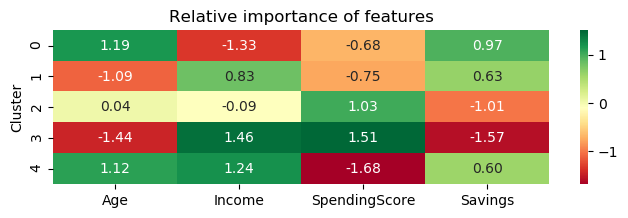

In [29]:
# Relative Importance Plot

dat = X.copy()
dat['Cluster'] = k_means.labels_

cluster_avg = dat.groupby(['Cluster']).mean()
population_avg = dat.drop(['Cluster'], axis=1).mean()

relative_imp = cluster_avg - population_avg

plt.figure(figsize=(8, 2));
plt.title('Relative importance of features');
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn');

# Model 2: DBSCAN

In [30]:
db = DBSCAN(eps=0.3, min_samples=3)
db.fit(X)

DBSCAN(eps=0.3, min_samples=3)

In [31]:
db.labels_

array([ 0,  0,  0,  0,  1,  2,  0,  1,  1,  1,  3,  4,  4,  4,  0,  3,  0,
        1,  1,  3,  4,  3,  0,  1, -1,  2,  2,  0,  1,  0,  0,  0,  1,  0,
        4,  0,  1,  0,  4,  4,  0,  1,  2,  0,  0,  2,  3,  2,  4,  0,  1,
        4,  2,  1,  0,  1,  4,  1,  1,  1,  1,  1,  1,  0,  0,  0,  1,  2,
        2,  0,  0,  4,  1,  1,  4,  0,  4,  0,  0,  2,  0, -1,  0,  1,  1,
        4,  4,  0,  0,  0,  0,  0,  2,  1,  0,  2,  4,  0,  0,  4,  4,  2,
        4,  2,  4,  1, -1,  4,  4,  0,  1,  4,  0,  4,  4,  4,  0,  4,  2,
        1,  4,  1,  1,  1,  4,  3,  0,  1,  0,  0,  4,  0,  4,  0,  2,  1,
        3,  2,  0,  4,  1,  0,  0,  2,  0,  2,  0,  3,  0,  1,  0,  4,  1,
        0,  1,  3,  4,  0,  1,  0,  4,  1,  0,  4, -1,  4,  1,  0,  4,  0,
        1,  0,  4,  0,  1,  0,  0,  1,  1,  1,  0,  0,  4,  2,  2,  1,  4,
        0,  0,  0,  4,  1,  0,  0,  0,  1, -1,  4,  1,  1,  1,  4,  0,  4,
        0,  4,  0,  1,  2,  0,  1,  1,  1,  1,  0,  1,  4,  2,  4,  1,  0,
        0,  4,  1,  4,  2

In [32]:
silhouette_score(X, db.labels_)

0.7679653694292776

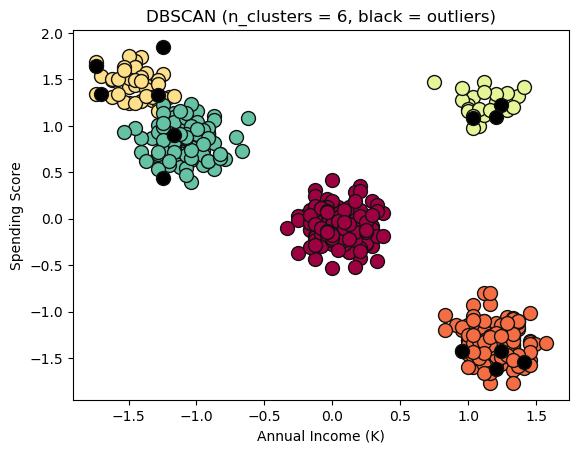

In [33]:
plt.figure();

unique_labels = set(db.labels_)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))];

for k in unique_labels:
    if k == -1:        # Black used for noise.
        col = [0, 0, 0, 1]
    else:
        col = colors[k]

    xy = X[db.labels_ == k]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=10);

    
plt.title('');
plt.title("DBSCAN (n_clusters = {:d}, black = outliers)".format(len(unique_labels)));
plt.xlabel('Annual Income (K)');
plt.ylabel('Spending Score');

# Elbow Method

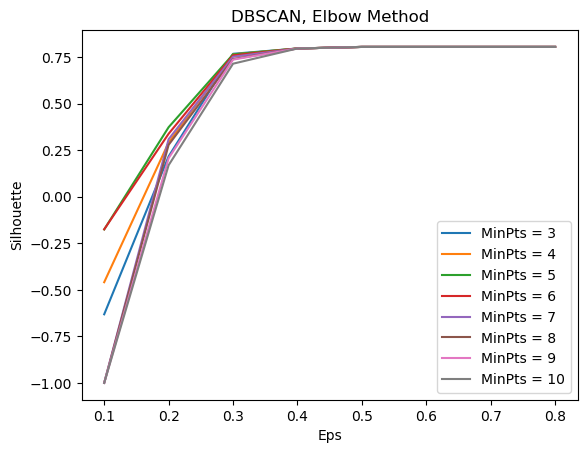

In [34]:
silhouettes = {}

epss = np.arange(0.1, 0.9, 0.1)
minss = [3, 4, 5, 6, 7, 8, 9, 10]

ss = np.zeros((len(epss), len(minss)))

for i, eps in enumerate(epss):
    for j, mins in enumerate(minss):
        db = DBSCAN(eps=eps, min_samples=mins).fit(X)
        if len(set(db.labels_)) == 1:
            ss[i, j] = -1
        else:
            ss[i, j] = silhouette_score(X, db.labels_, metric='euclidean')
    

plt.figure();
#plt.plot(list(silhouettes.keys()), list(silhouettes.values()));
for i in range(len(minss)):
    plt.plot(epss, ss[:, i], label="MinPts = {}".format(minss[i]));
#plt.plot(epss, ss[:, 1]);
plt.title('DBSCAN, Elbow Method')
plt.xlabel("Eps");
plt.ylabel("Silhouette");
plt.legend();
#plt.savefig('out/simple_dbscan_elbow');

# Parameter Exploration

eps=0.3, min_samples=2, n_clusters=5, sil=0.7679653694292776


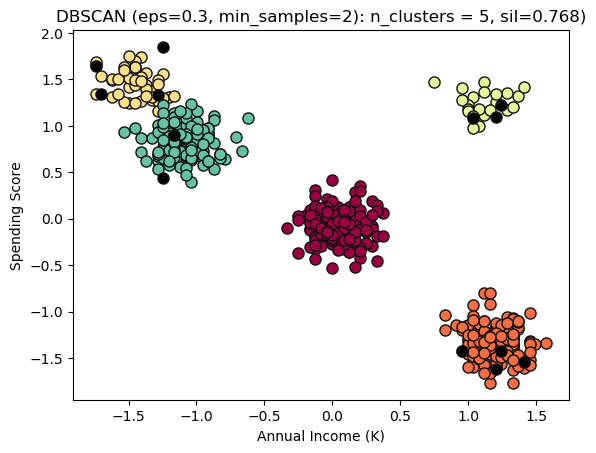

eps=0.1, min_samples=3, n_clusters=14, sil=-0.6313739076946371


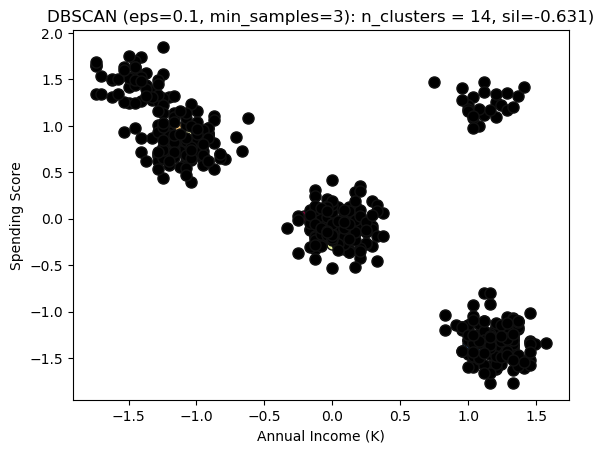

eps=0.3, min_samples=3, n_clusters=5, sil=0.7679653694292776


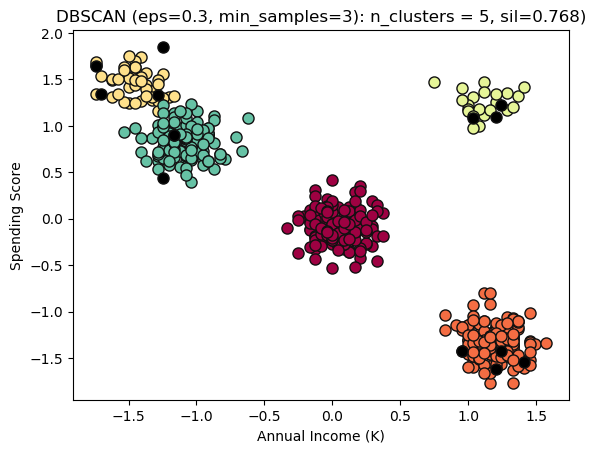

eps=0.6, min_samples=3, n_clusters=4, sil=0.8048976287755765


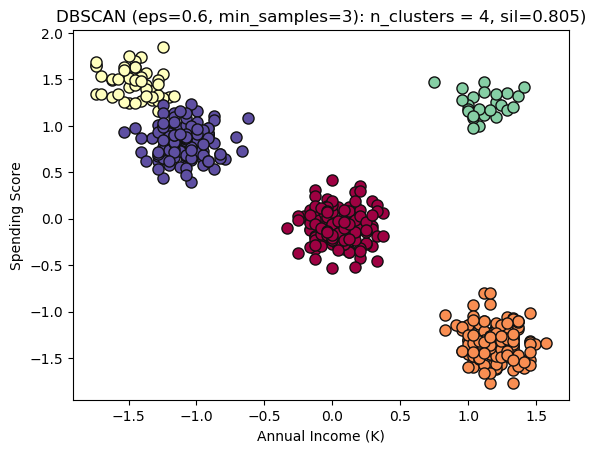

eps=0.6, min_samples=7, n_clusters=4, sil=0.8048976287755765


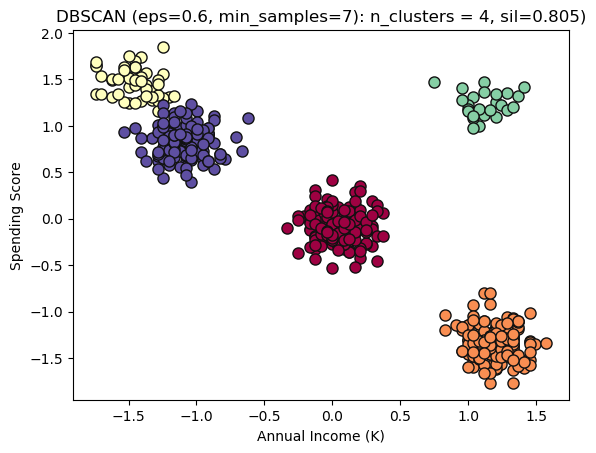

eps=0.36, min_samples=3, n_clusters=5, sil=0.7913054451716924


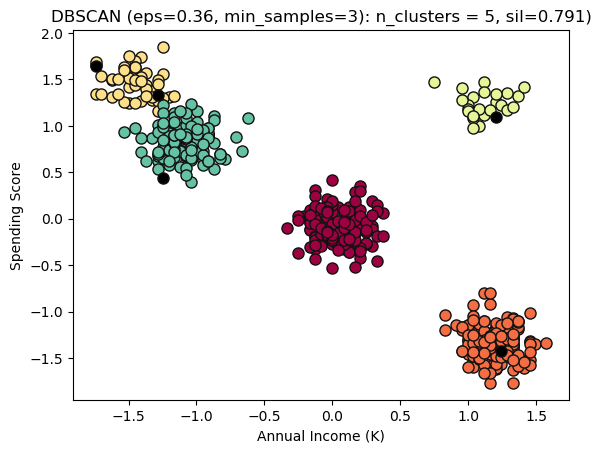

In [35]:
def do_and_plot_dbscan(X, eps, min_samples):
    db = DBSCAN(eps=eps, min_samples=min_samples).fit(X)

    unique_labels = set(db.labels_)
    n_clusters = len(unique_labels) - 1
    
    if n_clusters <= 1:
        #print('eps={}, min_samples={}, n_clusters <= 1. Returning.'.format(eps, min_samples))
        #return
        sil = -1
    else:
        sil = silhouette_score(X, db.labels_)
    
    print("eps={}, min_samples={}, n_clusters={}, sil={}".format(eps, min_samples, n_clusters, sil))
    
    plt.figure();
    
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))];

    for k in unique_labels:
        if k == -1:        # Black used for noise.
            col = [0, 0, 0, 1]
        else:
            col = colors[k]

        xy = X[db.labels_ == k]
        plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=8);


    plt.title('');
    plt.title("DBSCAN (eps={}, min_samples={}): n_clusters = {:d}, sil={:.3f})".format(eps, min_samples, n_clusters, sil));
    plt.xlabel('Annual Income (K)');
    plt.ylabel('Spending Score');
    #plt.savefig('out/simple_dbscan_{}_{}.png'.format(eps, min_samples))
    plt.show()


do_and_plot_dbscan(X, 0.3, 2)
do_and_plot_dbscan(X, 0.1, 3)
do_and_plot_dbscan(X, 0.3, 3)
do_and_plot_dbscan(X, 0.6, 3)
do_and_plot_dbscan(X, 0.6, 7)
do_and_plot_dbscan(X, 0.36, 3)

# Model 3: Hierarchical (Agglomerative)

In [36]:
agg = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
agg.fit(X)

AgglomerativeClustering(n_clusters=5)

In [37]:
agg.labels_

array([1, 1, 1, 1, 0, 3, 1, 0, 0, 0, 4, 2, 2, 2, 1, 4, 1, 0, 0, 4, 2, 4,
       1, 0, 4, 3, 3, 1, 0, 1, 1, 1, 0, 1, 2, 1, 0, 1, 2, 2, 1, 0, 3, 1,
       1, 3, 4, 3, 2, 1, 0, 2, 3, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 3, 3, 1, 1, 2, 0, 0, 2, 1, 2, 1, 1, 3, 1, 4, 1, 0, 0, 2, 2, 1,
       1, 1, 1, 1, 3, 0, 1, 3, 2, 1, 1, 2, 2, 3, 2, 3, 2, 0, 0, 2, 2, 1,
       0, 2, 1, 2, 2, 2, 1, 2, 3, 0, 2, 0, 0, 0, 2, 4, 1, 0, 1, 1, 2, 1,
       2, 1, 3, 0, 4, 3, 1, 2, 0, 1, 1, 3, 1, 3, 1, 4, 1, 0, 1, 2, 0, 1,
       0, 4, 2, 1, 0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 2, 3, 3, 0, 2, 1, 1, 1, 2, 0, 1, 1, 1, 0, 3, 2,
       0, 0, 0, 2, 1, 2, 1, 2, 1, 0, 3, 1, 0, 0, 0, 0, 1, 0, 2, 3, 2, 0,
       1, 1, 2, 0, 2, 3, 2, 1, 1, 0, 1, 1, 0, 1, 1, 1, 2, 1, 2, 2, 3, 1,
       1, 1, 4, 1, 2, 0, 3, 3, 3, 0, 1, 2, 0, 0, 2, 2, 1, 1, 4, 1, 1, 0,
       1, 0, 2, 3, 1, 2, 0, 1, 0, 0, 2, 1, 0, 0, 1, 1, 0, 2, 2, 4, 2, 0,
       0, 2, 4, 0, 0, 3, 1, 2, 2, 1, 2, 0, 0, 2, 1,

In [38]:
silhouette_score(X, agg.labels_)

0.8048976287755765

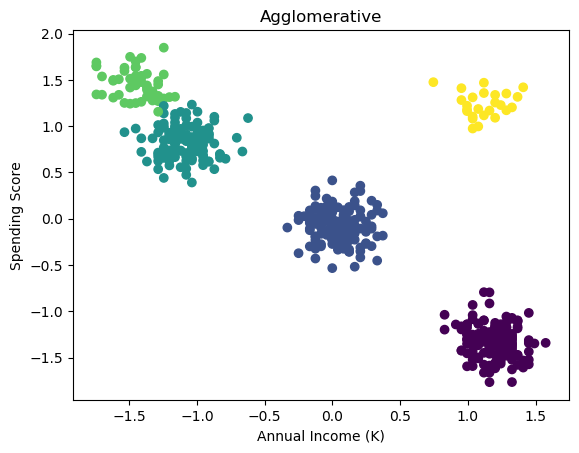

In [39]:
plt.figure();

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=agg.labels_);
plt.title("Agglomerative");
plt.xlabel('Annual Income (K)');
plt.ylabel('Spending Score');

# Dendograms, Linkages and Distance Metrics

Note that scikit learn does not itself currently support plotting dendograms. Instead, we'll use SciPy's cluster.hierarchy module to re-do the clustering, and plot the dendogram.

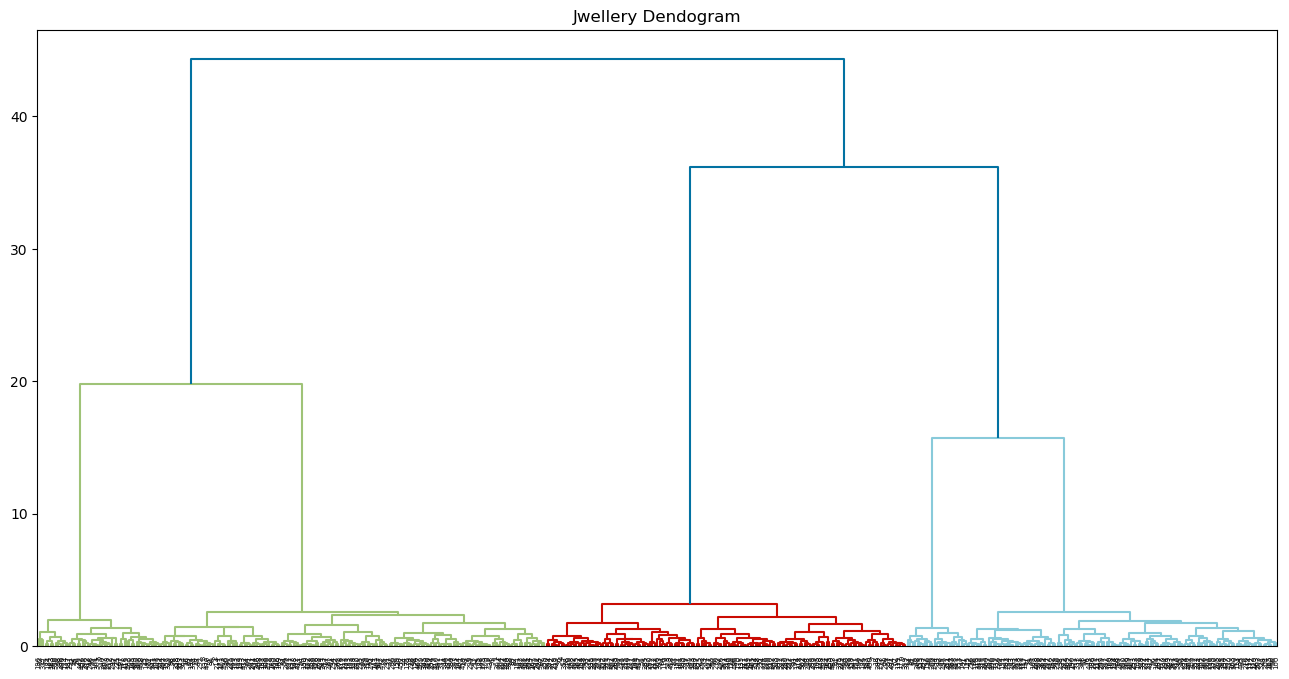

In [44]:
import scipy.cluster

aggl = scipy.cluster.hierarchy.linkage(X, method='ward', metric='euclidean')

# Plot the dendogram
plt.figure(figsize=(16, 8));
plt.grid(False)
plt.title("Jwellery Dendogram");  
dend = scipy.cluster.hierarchy.dendrogram(aggl);

In [46]:
# Let's find K=5 clusters
K=5
labels = scipy.cluster.hierarchy.fcluster(aggl, K, criterion="maxclust")

In [50]:
np.set_printoptions(precision=2)
np.set_printoptions(suppress=True)

means = np.zeros((K, X.shape[1]))

for i, label in enumerate(set(labels)):
    means[i,:] = X[labels==label].mean(axis=0)
    print('\nCluster {} (n={}):'.format(label, sum(labels==label)))
    print(scaler.inverse_transform(means[i,:]))
    
means


Cluster 1 (n=50):
[    24.18 128029.12      0.9    4087.52]

Cluster 2 (n=157):
[   59.96 72448.06     0.77  6889.97]

Cluster 3 (n=147):
[   87.78 27866.1      0.33 16659.26]

Cluster 4 (n=25):
[    86.   119944.04      0.07  14808.68]

Cluster 5 (n=126):
[    32.78 105265.81      0.31  14962.78]


array([[-1.44,  1.46,  1.51, -1.57],
       [ 0.04, -0.09,  1.03, -1.01],
       [ 1.19, -1.33, -0.68,  0.97],
       [ 1.12,  1.24, -1.68,  0.6 ],
       [-1.09,  0.83, -0.75,  0.63]])

In [52]:
# Or, we could have used panda's group-by function
col_names = X.columns
import pandas as pd

X_df = pd.DataFrame(scaler.inverse_transform(X), columns=col_names)
X_df['cluster'] = labels
X_df.head()

cl_group = X_df.groupby(['cluster']).agg('describe')
cl_group

cl_group.info()
cl_group['Age']

,Age,Income,SpendingScore,Savings,cluster
0,58.00,77769.00,0.79,6559.83,2
1,59.00,81799.00,0.79,5417.66,2
2,62.00,74751.00,0.70,9258.99,2
3,59.00,74373.00,0.77,7346.33,2
4,87.00,17760.00,0.35,16869.51,3


Age                                          Income            ...  \
         count  mean  std   min   25%   50%   75%   max  count      mean  ...   
cluster                                                                   ...   
1        50.00 24.18 3.66 17.00 22.00 24.50 27.00 31.00  50.00 128029.12  ...   
2       157.00 59.96 3.38 51.00 58.00 59.00 62.00 68.00 157.00  72448.06  ...   
3       147.00 87.78 3.51 79.00 85.00 88.00 91.00 97.00 147.00  27866.10  ...   
4        25.00 86.00 3.66 77.00 84.00 86.00 88.00 93.00  25.00 119944.04  ...   
5       126.00 32.78 3.79 22.00 30.00 33.00 35.00 44.00 126.00 105265.81  ...   

        SpendingScore      Savings                                     \
                  75%  max   count     mean     std      min      25%   
cluster                                                                 
1                0.93 1.00   50.00  4087.52 1277.75     0.00  3275.32   
2                0.80 0.91  157.00  6889.97 1052.28  4077.66  6225.38   
3                0.36 0.47  147.00 16659.26 1183.85 13470.97 15957.28   
4                0.08 0.16   25.00 14808.68 1159.34 12554.69 14047.39   
5                0.34 0.41  126.00 14962.78 1061.73 12207.53 14223.79   

                                    
             50%      75%      max  
cluster                             
1        4361.97  4986.86  6089.48  
2        6845.06  7497.23 10547.78  
3       16711.07 17433.13 20000.00  
4       14773.41 15391.95 17833.09  
5       14976.94 15682.29 17968.55  

[5 rows x 32 columns]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 1 to 5
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   (Age, count)            5 non-null      float64
 1   (Age, mean)             5 non-null      float64
 2   (Age, std)              5 non-null      float64
 3   (Age, min)              5 non-null      float64
 4   (Age, 25%)              5 non-null      float64
 5   (Age, 50%)              5 non-null      float64
 6   (Age, 75%)              5 non-null      float64
 7   (Age, max)              5 non-null      float64
 8   (Income, count)         5 non-null      float64
 9   (Income, mean)          5 non-null      float64
 10  (Income, std)           5 non-null      float64
 11  (Income, min)           5 non-null      float64
 12  (Income, 25%)           5 non-null      float64
 13  (Income, 50%)           5 non-null      float64
 14  (Income, 75%)           5 non-null      float6

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
1,50.00,24.18,3.66,17.00,22.00,24.50,27.00,31.00
2,157.00,59.96,3.38,51.00,58.00,59.00,62.00,68.00
3,147.00,87.78,3.51,79.00,85.00,88.00,91.00,97.00
4,25.00,86.00,3.66,77.00,84.00,86.00,88.00,93.00
5,126.00,32.78,3.79,22.00,30.00,33.00,35.00,44.00


# Exemplars from Hierarchical

In [54]:
from scipy.spatial import distance

for i, label in enumerate(set(labels)):
    X_tmp= X
    exemplar_idx = distance.cdist([means[i]], X).argmin()
   
    print('\nCluster {}:'.format(label))
    #print("  Examplar ID: {}".format(exemplar_idx))
    #print("  Label: {}".format(labels[exemplar_idx]))
    #print("  Features:")
    display(data.iloc[[exemplar_idx]])


Cluster 1:


,Age,Income,SpendingScore,Savings
95,25,130934,0.91,3942.39



Cluster 2:


,Age,Income,SpendingScore,Savings
467,61,72027,0.76,6926.12



Cluster 3:


,Age,Income,SpendingScore,Savings
335,89,26940,0.33,16555.16



Cluster 4:


,Age,Income,SpendingScore,Savings
155,86,115689,0.06,14803.15



Cluster 5:


,Age,Income,SpendingScore,Savings
405,34,103204,0.30,15149.81


# Model 4: Gaussian Mixture Models(GMM)

In [41]:
gmm = GaussianMixture(n_components=5, covariance_type='full').fit(X)

labels = gmm.predict(X)
silhouette_score(X, labels)

0.8048976287755765

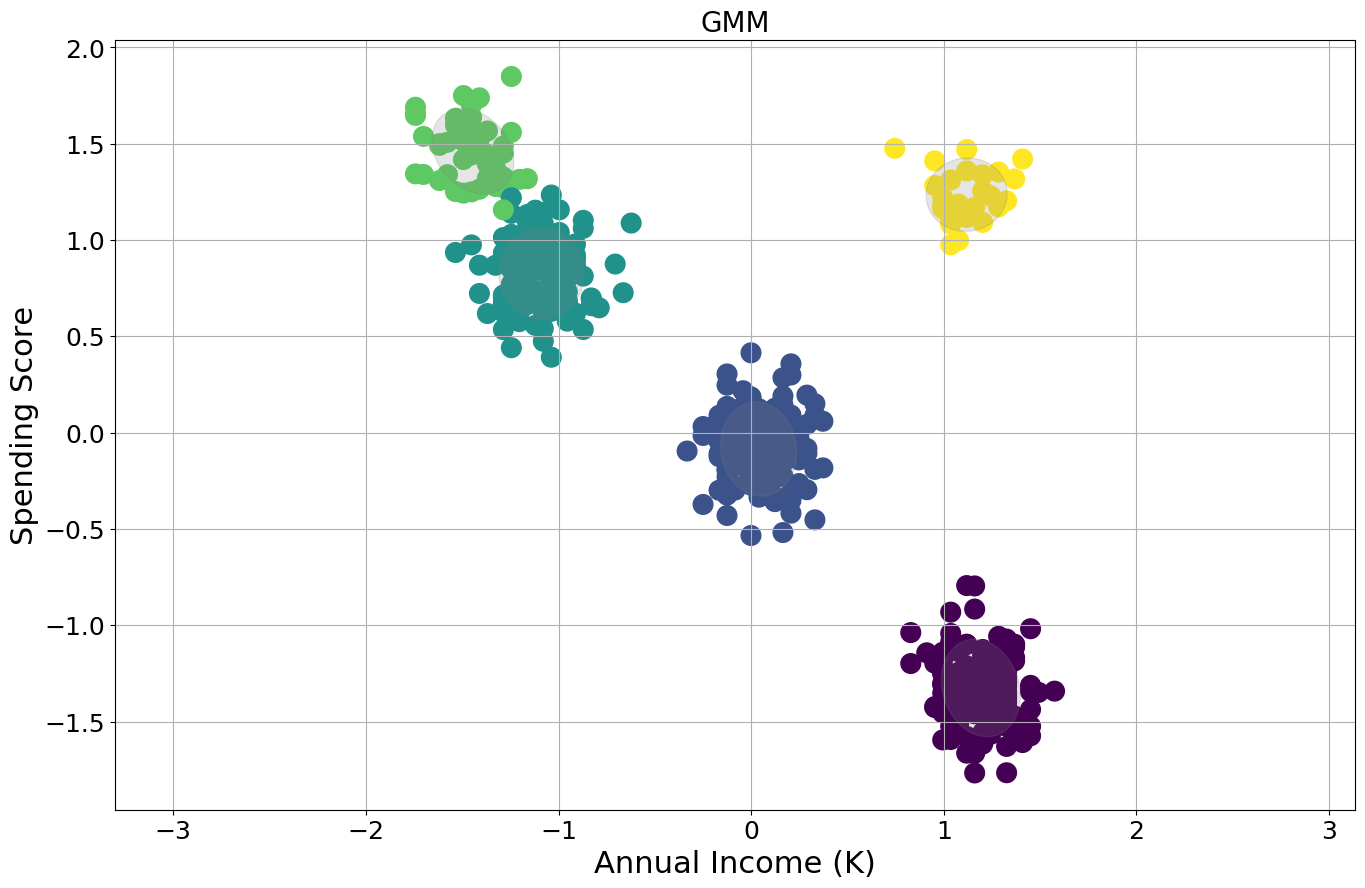

In [42]:
# From:
# https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_covariances.html
import matplotlib as mpl

def make_ellipses(gmm, ax):
    for n, label in enumerate(set(labels)):
        if gmm.covariance_type == 'full':
            covariances = gmm.covariances_[n][:2, :2]
        elif gmm.covariance_type == 'tied':
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == 'diag':
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == 'spherical':
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(gmm.means_[n, :2], v[0], v[1],
                                  180 + angle, color='grey')
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.2)
        ax.add_artist(ell)
        ax.set_aspect('equal', 'datalim')

plt.figure(figsize=(16, 10));
plt.grid(True);

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s=200, c=labels);
make_ellipses(gmm, plt.gca())
plt.title("GMM", fontsize=20);
plt.xlabel('Annual Income (K)', fontsize=22);
plt.ylabel('Spending Score', fontsize=22);
plt.xticks(fontsize=18);
plt.yticks(fontsize=18);

End of Code